# 보스톤 집값 예측하기

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
dataset = load_boston() # 딕셔너리(사전) : key-value
print(dataset.keys()) # 불러올 수 있는 키값들
# data : 독립변수들(feature)
# target : 종속변수, 예측대상
# feature_names : column name

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
dataset['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
 pd.DataFrame(dataset['data'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
import pandas as pd

df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
# df.head()
df['target'] = dataset['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 학습 루프
* 모델 정의 -> [ 데이터 불러오기 -> 손실(에러) 계산 -> 오차 역전파 및 최적화 ] (만족할 때까지 반복) -> 학습 완료(종료)

* 연속형 변수를 예측하는데 쓸 수 있는 가장 간단한 알고리즘? : 선형 회귀

## 선형회귀
> 데이터를 직선으로 관계를 나타내는 방법<br>
> 데이터를 y와 x의 관계로 표현되는 직선으로 나타내는 방법
* 회귀에 의해 얻은 결과를 실제 데이터(target)와 비교 & 오차를 줄여나가는 방식으로 학습
* MSE(Mean Squared Error, 평균 제곱 오차) : 작은 오차와 큰 오차를 강하게 대비시킬 수 있어서 유용

* torch.nn.Sequential() 객체에 모듈(선형 회귀)을 집어넣어주면, PyTorch가 알아서 순서대로 처리(계산)
* torch.nn.Linear (선형 회귀 모델)

![MLP](https://i.imgur.com/ISxVoTq.png)
* 선형 회귀에 이용할 다층 신경망 구조 (MLP)
* MLP층은 각 층의 뉴런이 다음 층의 모든 뉴런과 연결이 되어 있기 때문에 완전연결층(fully connected layer, FC)라고도 불림
    1. 먼저 입력층에 입력 데이터가 들어옴
    2. 은닉층에 전달 -> 입력 데이터의 특징으로 정보를 추출
    3. 출력층에 전달 -> 예측값 <-> 실제 정답을 비교 손실(에러)을 계산 (정보가 입력층에서 출력층까지 흘러감 = 순전파)
    4. 손실을 계산하고 가중치를 수정하기 오차를 역전파

## 배치(batch)와 에포크(epoch)
* 컴퓨터의 메모리 (한정) -> 한번에 처리 X -> 전체 데이터를 나눠서 학습 (학습하는 단위 ; 배치(batch))
* 배치 : 딥러닝 모델의 가중치(손실 보정)를 업데이트 시킬 때 사용되는 데이터의 묶음 단위
* 에포크 : 배치의 크기 단위로 전체 데이터를 모두 학습하는 단위
* 이터레이션(iteration) : 1에포크를 완성시키는 데 필요한 배치의 반복횟수
예) 1에포크 = 1000개 / 배치 = 50개 / 이터레이션 = 20회
> 에포크 = 배치 * 이터레이션

In [ ]:
import torch
import torch.nn as nn

In [ ]:
from torch.optim.adam import Adam # 최적화

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
model = nn.Sequential( # nn -> Sequential 순차적으로 전파(순전파) 구조 객체
    # 입력차원의 갯수 = X(독립변수들)의 열 갯수
    # 선형회귀 13 입력 -> 100
    # 입력하는 독립변수의 수 = 입력층의 받는 갯수
    nn.Linear(13, 100), # 13개의 입력차원, 100개의 출력차원
    # nn.Linear(12, 100), <- 절대 안됨!!! 일치해야함!!!
    nn.ReLU(), # 활성화 함수
    nn.Linear(100, 1)
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=13, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
X = df.iloc[:, :13].values # df.drop('target', axis=1).values
Y = df.target.values
X, Y # 파이토치 -> 텐서 -> Numpy Array로 변환

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
batch_size = 100 # 손실 가중치 업데이트할 때 반영할 데이터 단위
learning_rate = 0.001 # 학습률

In [ ]:
# 가중치를 수정하는 최적화 함수
optim = Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 에포크 반복 <- 전체 한 번의 데이터로 학습을 하는 것 (배치 사이즈 * 이터테이션)
for epoch in range(200):
    # 배치(batch-size -> batch) 반복
    # len(X) // batch_size => 몫 : iteration을 구함
    # 506 // 100 = 5
    for i in range(len(X) // batch_size): # 0, 1, 2, 3, 4, (5)...
        start = i * batch_size # 0, 1, ... : 0, 100, ...
        end = start + batch_size # 0, 100, ... : 100, 200, ...
        # 파이토치 실수형 텐서로 변환
        x = torch.FloatTensor(X[start:end]) # 독립변수들이 담긴 tensor
        y = torch.FloatTensor(Y[start:end]) # 종속변수가 담긴 tensor

        # 가중치 업데이트하기 위한 과정
        optim.zero_grad() # 가중치의 기울기를 0으로 초기화
        preds = model(x) # 모델의 예측값
        # (preds - y).pow(2).sum().item() -> nn.MSELoss()(preds, y)
        loss = nn.MSELoss()(preds, y) # MSE 손실(에러) 계산
        loss.backward() # 오차 역전파
        optim.step() # 최적화
    
    if epoch % 20 == 0:
        print(f"epoch{epoch} loss:{loss.item()}")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch0 loss:37.23876190185547
epoch20 loss:37.2158203125
epoch40 loss:37.195499420166016
epoch60 loss:37.14847946166992
epoch80 loss:37.15046691894531
epoch100 loss:37.189910888671875
epoch120 loss:37.214378356933594
epoch140 loss:37.29501724243164
epoch160 loss:37.37144088745117
epoch180 loss:37.431663513183594


In [ ]:
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"prediction : {prediction.item()} real: {real}")

prediction : 25.928821563720703 real: 24.0


In [ ]:
preds = []
reals = []

def compare(row_num):
    prediction = model(torch.FloatTensor(X[row_num, :13]))
    real = Y[row_num]
    # print(f"prediction : {prediction.item()} real: {real}")
    preds.append(prediction.item())
    reals.append(real)

for i in range(len(X)):
    compare(i)

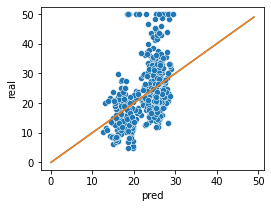

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = pd.DataFrame({"pred": preds, "real": reals})
plt.figure(figsize=(4,3))
sns.scatterplot(data=df2, x='pred', y='real')
# plt.xlim(0, 55)
# plt.ylim(0, 55)
plt.plot([(i, i) for i in range(50)])
plt.show()